# **EDA**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("../../finnhubAPI/data/porEmpresas/definitivos/INDEX_ALL_scrapped_filtrado.csv")

df.head(5)

,provider,ticker,published_utc,headline,summary,url_redirect,image_url,source,url_final,url_canonical,url_original,domain,http_status,error,article_text,topic
0,finnhub,AAPL,2025-10-14T06:40:39,UK pay growth slows and unemployment ticks hig...,The UK jobs market continues to show signs of ...,https://finnhub.io/api/news?id=8648c567d7b25a8...,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,Yahoo,https://uk.finance.yahoo.com/news/uk-pay-growt...,https://uk.finance.yahoo.com/news/uk-pay-growt...,https://uk.finance.yahoo.com/news/uk-pay-growt...,yahoo.com,200.0,NaN,The UK jobs market continues to show signs of ...,2_company_year_u_ha
1,finnhub,AAPL,2025-10-14T05:00:06,Rising pension age hits women hardest,Enabling people to work for longer can spell g...,https://finnhub.io/api/news?id=c15b8eb813e3ef3...,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,Yahoo,https://uk.finance.yahoo.com/news/rising-pensi...,https://uk.finance.yahoo.com/news/rising-pensi...,https://uk.finance.yahoo.com/news/rising-pensi...,yahoo.com,200.0,NaN,New data from the Department from Work and Pen...,1_think_going_just_like
2,finnhub,AAPL,2025-10-14T05:00:00,How to ask for changes at work if you are neur...,Advocating for yourself can help create a cult...,https://finnhub.io/api/news?id=96a2e7b9c93285d...,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,Yahoo,https://uk.finance.yahoo.com/news/neurodiverge...,https://uk.finance.yahoo.com/news/neurodiverge...,https://uk.finance.yahoo.com/news/neurodiverge...,yahoo.com,200.0,NaN,Asking for workplace accommodations is often e...,1_think_going_just_like
3,finnhub,AAPL,2025-10-14T03:38:44,Apple announces major expansion of renewables ...,The tech giant has increased its involvement i...,https://finnhub.io/api/news?id=c1d9f815fe2dfba...,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,Yahoo,https://uk.finance.yahoo.com/news/apple-announ...,https://uk.finance.yahoo.com/news/apple-announ...,https://uk.finance.yahoo.com/news/apple-announ...,yahoo.com,200.0,NaN,Apple has announced a major expansion of its r...,2_company_year_u_ha
4,finnhub,AAPL,2025-10-14T01:02:00,"1 Unstoppable Stock Poised to Join Nvidia, App...",Semiconductors form the foundation of the arti...,https://finnhub.io/api/news?id=71e1efd5f572c0e...,https://s.yimg.com/rz/stage/p/yahoo_finance_en...,Yahoo,https://www.fool.com/investing/2025/10/13/1-un...,https://www.fool.com/investing/2025/10/13/1-un...,https://www.fool.com/investing/2025/10/13/1-un...,fool.com,200.0,NaN,The advent of artificial intelligence (AI) les...,0_ai_company_nvidia_billion


In [3]:
cols_keep = ["ticker", "headline", "summary", "article_text", "topic"]
df = df[cols_keep]

df = df.dropna(subset=["article_text", "headline"])

print("Columnas conservadas:", df.columns.tolist())
print("Total de registros tras limpieza:", len(df))
df.head(5)

df.to_csv("datasetClean.csv",index=False)

Columnas conservadas: ['ticker', 'headline', 'summary', 'article_text', 'topic']
Total de registros tras limpieza: 5160


C:\Users\mpsua\AppData\Local\Temp\ipykernel_5436\3884592179.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_tickers.values, y=top_tickers.index, palette="Blues_d")


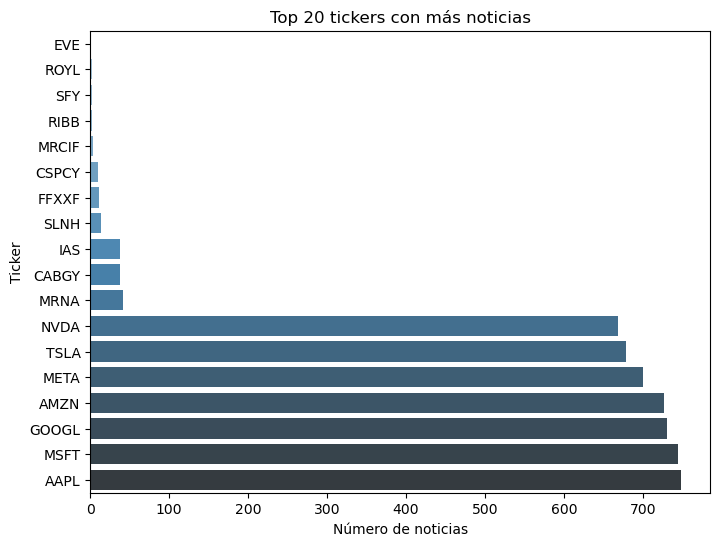

In [13]:
top_tickers = (
    df["ticker"]
    .value_counts()
    .head(20)
    .sort_values(ascending=True)
)

plt.figure(figsize=(8,6))
sns.barplot(x=top_tickers.values, y=top_tickers.index, palette="Blues_d")
plt.title("Top 20 tickers con más noticias")
plt.xlabel("Número de noticias")
plt.ylabel("Ticker")
plt.show()

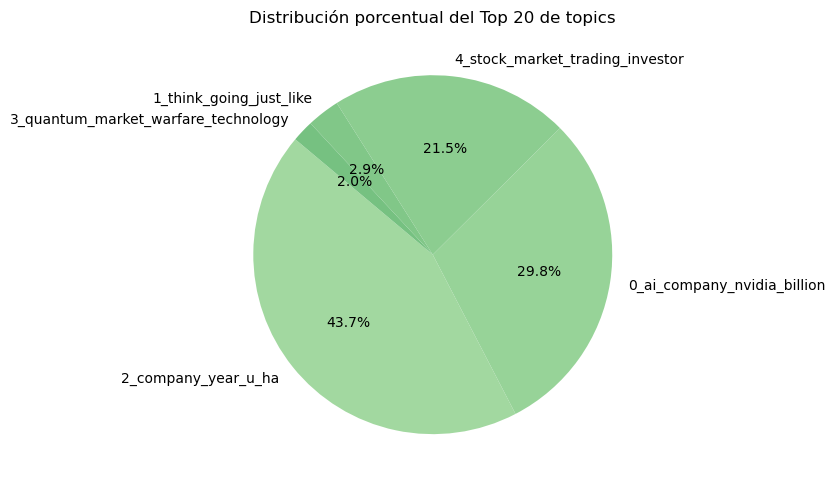

In [ ]:
topic_counts = df["topic"].value_counts()

plt.figure(figsize=(8,8))
plt.pie(
    topic_counts.values,
    labels=topic_counts.index,
    autopct="%1.1f%%",
    startangle=140,
    colors=sns.color_palette("Greens_d", n_colors=20)
)
plt.title("Distribución porcentual del Top 20 de topics")
plt.tight_layout()
plt.show()



Se observa un fuerte desbalance en la distribución de topic, donde un único grupo representa más del 40% del corpus. Además, los nombres de los topics parecen generados automáticamente y no reflejan categorías financieras interpretables.

Teniendo esto en cuenta para tareas posteriores (clasificación de eventos), será necesario redefinir los topics manual o semiautomáticamente a partir del texto.